In [1]:
# Import packages
import scanpy as sc
import pandas as pd
from functions import data_preprocessing as dp
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## Add cell type labels

In [2]:
norm_qc_adata = sc.read_h5ad('../../../../data/processed/data_for_evaluating_cell_type_annotation/MacParland.h5ad')

In [3]:
norm_qc_adata

AnnData object with n_obs × n_vars = 8444 × 15386
    obs: 'cell_type', 'sample_ID', 'patientID'
    var: 'n_cells'

## Visualize

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


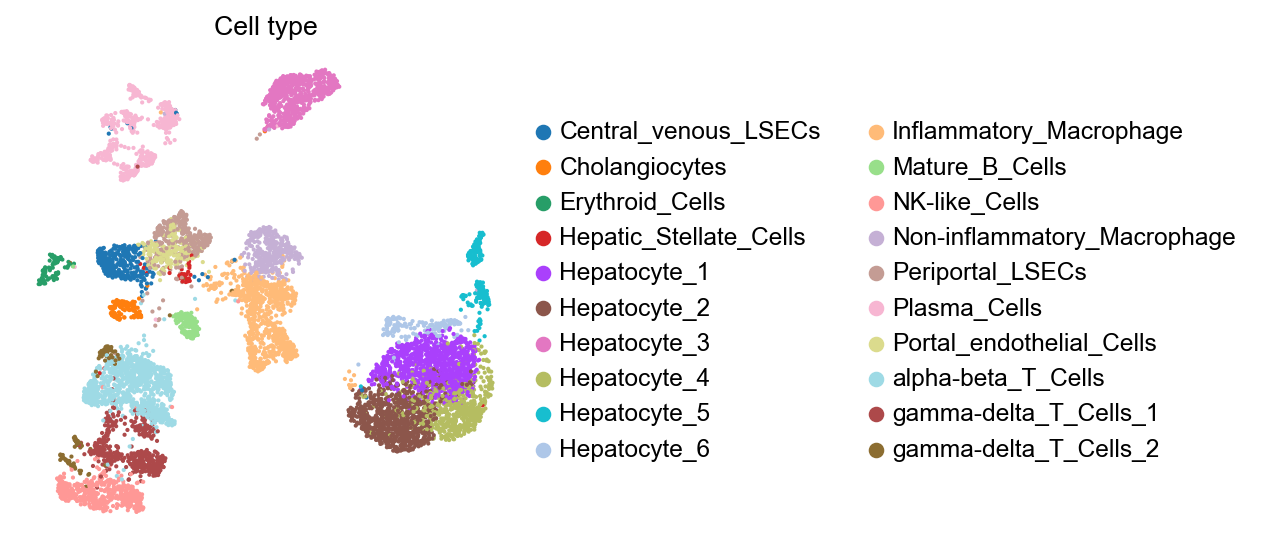

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


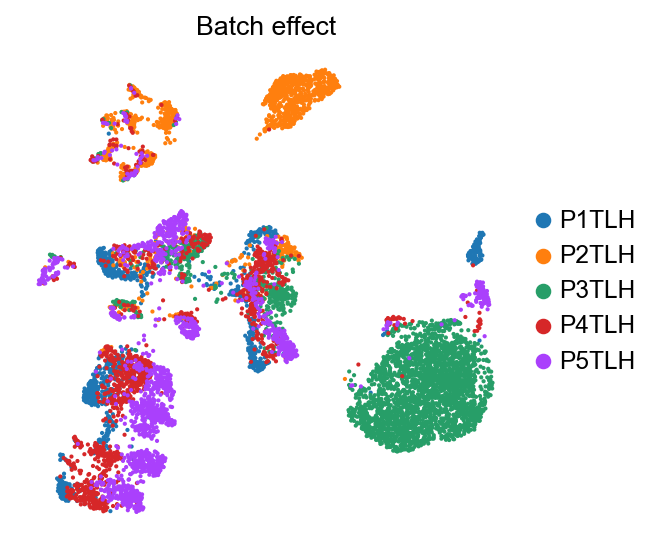

In [4]:
sc.settings.set_figure_params(dpi_save=600,  frameon=False, transparent=True, fontsize=12)

vis_adata = norm_qc_adata.copy()
sc.pp.highly_variable_genes(vis_adata, n_top_genes=4000, flavor="cell_ranger")

sc.pp.pca(vis_adata, n_comps=40, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(vis_adata, n_neighbors=15, n_pcs=40)
sc.tl.umap(vis_adata)
#sc.pl.umap(vis_adata, color='cell_type', title='')
sc.pl.umap(vis_adata, color='cell_type', ncols=1, title="Cell type", show=True, save=f"MacParland_pca_cell_type.svg")
sc.pl.umap(vis_adata, color="patientID", ncols=1, title="Batch effect", show=True, save=f"MacParland_pca_batch_effect.svg")